In [ ]:
# 导入所需的库
%matplotlib inline
import cv2
import tkinter as tk
from tkinter import filedialog, messagebox
from PIL import Image, ImageTk
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

# 创建窗口
window = tk.Tk()
window.title("图像处理工具")
window.geometry("1080x1040")
window.configure(bg="lightblue")  # 设置窗口背景色为浅蓝色

# 定义全局变量
img1 = None
img2 = None
img3 = None  # 添加一个新的全局变量来存储第二个原图

# 创建左侧图片展示栏（原图1）
left_frame1 = tk.LabelFrame(window, text="原图1")
left_frame1.place(relx=0.001, rely=0, width=350, height=350)
left_image_label1 = tk.Label(left_frame1)
left_image_label1.pack()

# 创建中间图片展示栏（原图2）
mid_frame = tk.LabelFrame(window, text="原图2")
mid_frame.place(relx=0.34, rely=0, width=350, height=350)  # 调整位置以放置在中间
mid_image_label = tk.Label(mid_frame)
mid_image_label.pack()

# 创建右侧图片展示栏（效果图）
right_frame = tk.LabelFrame(window, text="效果图")
right_frame.place(relx=0.676, rely=0.0001, width=350, height=350)
right_image_label = tk.Label(right_frame)
right_image_label.pack()

# 图片展示函数
def show_image(img, label):
    img = cv2.resize(img, (int(img.shape[1] * 0.6), int(img.shape[0] * 0.6)))  # 缩小为原本尺寸的60%
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = Image.fromarray(img)
    imgtk = ImageTk.PhotoImage(image=img)
    label.config(image=imgtk)
    label.image = imgtk

# 加载并显示图片
def load_image():
    file_path = filedialog.askopenfilename(title="选择图片")  # 弹出文件对话框选择图片
    if file_path:
        global img1
        img1 = cv2.imread(file_path)  # 读取图片
        if img1 is not None:
            show_image(img1, left_image_label1)  # 显示图片

# 保存图片
def save_image():
    if img2 is not None:
        file_path = filedialog.asksaveasfilename(defaultextension=".jpg")
        if file_path:
            cv2.imwrite(file_path, img2)
            messagebox.showinfo("保存成功", "图片已保存成功！")
    else:
        messagebox.showerror("保存失败", "请先选择图片并进行处理！")

# 退出系统
def exit_system():
    if messagebox.askyesno("确认", "是否退出系统？"):
        window.destroy()

# 添加按钮来加载图片
load_button = tk.Button(window, text="导入图片", command=load_image)
load_button.place(x=100, y=400)


# 添加按钮来保存图片
save_button = tk.Button(window, text="保存图片", command=save_image)
save_button.place(x=400, y=400)  # 在窗口的坐标（100, 100）处放置按钮


# 添加按钮来退出系统
exit_button = tk.Button(window, text="退出系统", command=exit_system)
exit_button.place(x=10,y=400)# 加载并展示第二张图片
def load_and_show_second_image():
    global img2
    file_path = filedialog.askopenfilename(title="选择第二张图片")  # 弹出文件对话框选择图片
    if file_path:
        img2 = cv2.imread(file_path)  # 读取第二张图片
        if img2 is not None:
            show_image(img2, mid_image_label)  # 显示第二张图片

# 添加按钮来加载第二个原图
load_button2 = tk.Button(window, text="插入第二个图片", command=load_and_show_second_image)
load_button2.place(x=200, y=400)



# 图像代数运算与逻辑运算
def image_operation(operation_type):
    global img1, img2, img3
    if img1 is not None and img2 is not None:
        if operation_type == "加运算":
            img3 = cv2.add(img1, img2)
        elif operation_type == "减运算":
            img3 = cv2.subtract(img1, img2)
        elif operation_type == "逻辑与":
            img3 = cv2.bitwise_and(img1, img2)
        elif operation_type == "逻辑或":
            img3 = cv2.bitwise_or(img1, img2)
  
        if img3 is not None:
            show_image(img3, right_image_label)
    else:
        messagebox.showerror("错误", "请先导入两张图片")

# 创建图像代数运算与逻辑运算的按钮和下拉框
operation_label = tk.Label(window, text="图像代数运算与逻辑运算：")
operation_label.place(x=10,y=440)

operations = ["加运算", "减运算", "逻辑与", "逻辑或"]
operation_variable = tk.StringVar(window)
operation_variable.set(operations[0])
operation_dropdown = tk.OptionMenu(window, operation_variable, *operations)
operation_dropdown.place(x=10,y=470)

operation_button = tk.Button(window, text="执行操作", command=lambda: image_operation(operation_variable.get()))
operation_button.place(x=10,y=510)

# 图像灰度化
def grayscale_conversion():
    global img1, img2
    if img1 is not None:
        img2 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
        show_image(img2, right_image_label)
    else:
        messagebox.showerror("错误", "请先导入图片")

grayscale_button = tk.Button(window, text="图像灰度化", command=grayscale_conversion)
grayscale_button.place(x=480,y=400)

# 图像二值化
def thresholding():
    global img1, img2
    if img1 is not None:
        _, img2 = cv2.threshold(img1, 127, 255, cv2.THRESH_BINARY)
        show_image(img2, right_image_label)
    else:
        messagebox.showerror("错误", "请先导入图片")

threshold_button = tk.Button(window, text="图像二值化", command=thresholding)
threshold_button.place(x=570,y=400)

# 图像对数变换
def logarithmic_transformation():
    global img1, img2
    if img1 is not None:
        img2 = np.log1p(img1.astype(np.float32))
        img2 = (img2 / np.max(img2)) * 255  # 将结果重新缩放到 [0, 255] 范围内
        img2 = np.uint8(img2)
        show_image(img2, right_image_label)
    else:
        messagebox.showerror("错误", "请先导入图片")

logarithmic_button = tk.Button(window, text="图像对数变换", command=logarithmic_transformation)
logarithmic_button.place(x=660, y=400)

# 几何变换
def rotate_image():
    global img1, img2
    if img1 is not None:
        rows, cols, _ = img1.shape
        M = cv2.getRotationMatrix2D((cols/2, rows/2), 45, 1)
        img2 = cv2.warpAffine(img1, M, (cols, rows))
        show_image(img2, right_image_label)
    else:
        messagebox.showerror("错误", "请先导入图片")

rotate_button = tk.Button(window, text="旋转变换", command=rotate_image)
rotate_button.place(x=750,y=400)

 
 
# 直方图均衡化
def histogram_equalization():
    global img1, img2
    if img1 is not None:
        img2 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
        img2_equalized = cv2.equalizeHist(img2)

        # 计算原始图像的直方图
        hist_original = cv2.calcHist([cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)], [0], None, [256], [0, 256])

        # 计算均衡化后的直方图
        hist_equalized = cv2.calcHist([img2_equalized], [0], None, [256], [0, 256])

        # 在Tkinter窗口中显示直方图
        hist_window = tk.Toplevel(window)
        hist_window.title("直方图对比")

        # 创建Matplotlib图形并添加到Canvas中
        fig, ax = plt.subplots(1, 2, figsize=(10, 4))
        ax[0].plot(hist_original, color='b')
        ax[0].set_title('原始图像直方图')
        ax[0].set_xlim([0, 256])

        ax[1].plot(hist_equalized, color='r')
        ax[1].set_title('均衡化后直方图')
        ax[1].set_xlim([0, 256])

        canvas = FigureCanvasTkAgg(fig, master=hist_window)
        canvas.draw()
        canvas.get_tk_widget().pack()

        # 显示均衡化后的图像
        show_image(img2_equalized, right_image_label)
    else:
        messagebox.showerror("错误", "请先导入图片")



histogram_button = tk.Button(window, text="直方图均衡化", command=histogram_equalization)
histogram_button.place(x=820, y=400)


 
# 图像的采样与量化
def sampling_quantization():
    global img1, img2
    if img1 is not None:
        img2_sampled = cv2.resize(img1, (int(img1.shape[1] * 0.3), int(img1.shape[0] * 0.3)))

        # 创建新的窗口来显示原图和处理后的图像
        sample_window = tk.Toplevel(window)
        sample_window.title("图像采样与量化对比")

        # 显示原图
        original_image_label = tk.Label(sample_window)
        original_image_label.pack(side="left")
        img1_resized = cv2.resize(img1, (300, 300))  # 调整大小以适应窗口
        show_image(img1_resized, original_image_label)

        # 显示采样与量化后的图像
        processed_image_label = tk.Label(sample_window)
        processed_image_label.pack(side="right")
        show_image(img2_sampled, processed_image_label)
    else:
        messagebox.showerror("错误", "请先导入图片")



sampling_button = tk.Button(window, text="图像的采样与量化", command=sampling_quantization)
sampling_button.place(x=930, y=400)




# 傅里叶变换
def fourier_transform():
    global img1, img2
    if img1 is not None:
        img2 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
        f = np.fft.fft2(img2)
        fshift = np.fft.fftshift(f)
        magnitude_spectrum = 20 * np.log(np.abs(fshift))

        # 转换为可显示的图像
        magnitude_spectrum = np.asarray(magnitude_spectrum, dtype=np.uint8)
        magnitude_spectrum = cv2.cvtColor(magnitude_spectrum, cv2.COLOR_GRAY2RGB)

        show_image(magnitude_spectrum, right_image_label)
    else:
        messagebox.showerror("错误", "请先导入图片")




fourier_button = tk.Button(window, text="傅里叶变换", command=fourier_transform)
fourier_button.place(x=520,y=440)

# 形态学处理
def morphological_processing(operation_type):
    global img1, img2
    if img1 is not None:
        img2 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
        kernel = np.ones((5, 5), np.uint8)
        if operation_type == "腐蚀":
            img2 = cv2.erode(img2, kernel, iterations=1)
        elif operation_type == "膨胀":
            img2 = cv2.dilate(img2, kernel, iterations=1)
        elif operation_type == "开运算":
            img2 = cv2.morphologyEx(img2, cv2.MORPH_OPEN, kernel)
        elif operation_type == "闭运算":
            img2 = cv2.morphologyEx(img2, cv2.MORPH_CLOSE, kernel)

        show_image(img2, right_image_label)
    else:
        messagebox.showerror("错误", "请先导入图片")

morphological_operations = ["腐蚀", "膨胀", "开运算", "闭运算"]
morphological_variable = tk.StringVar(window)
morphological_variable.set(morphological_operations[0])
morphological_label = tk.Label(window, text="形态学处理：")
morphological_label.place(x=220,y=440)
morphological_dropdown = tk.OptionMenu(window, morphological_variable, *morphological_operations)
morphological_dropdown.place(x=220,y=470)
morphological_button = tk.Button(window, text="执行操作", command=lambda: morphological_processing(morphological_variable.get()))
morphological_button.place(x=220,y=510)

# 图像镜像变换
def mirror_image():
    global img1, img2
    if img1 is not None:
        img2 = cv2.flip(img1, 1)  # 进行水平镜像变换
        show_image(img2, right_image_label)
    else:
        messagebox.showerror("错误", "请先导入图片")

mirror_button = tk.Button(window, text="图像镜像变换", command=mirror_image)
mirror_button.place(x=10, y=660)

# 图像透视变换
def perspective_transform():
    global img1, img2
    if img1 is not None:
        rows, cols, _ = img1.shape
        pts1 = np.float32([[50, 50], [200, 50], [50, 200], [200, 200]])  # 原图中待变换区域的四个角点
        pts2 = np.float32([[10, 100], [200, 50], [100, 250], [200, 200]])  # 目标图像中对应的四个角点
        matrix = cv2.getPerspectiveTransform(pts1, pts2)
        img2 = cv2.warpPerspective(img1, matrix, (cols, rows))  # 应用透视变换
        show_image(img2, right_image_label)
    else:
        messagebox.showerror("错误", "请先导入图片")

perspective_button = tk.Button(window, text="图像透视变换", command=perspective_transform)
perspective_button.place(x=150, y=660)

# 边缘检测与图像分割
def edge_detection_segmentation(operation_type):
    global img1, img2
    if img1 is not None:
        img2 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
        if operation_type == "Canny边缘检测":
            img2 = cv2.Canny(img2, 100, 200)
        elif operation_type == "Hough变换":
            edges = cv2.Canny(img2, 100, 200)
            lines = cv2.HoughLinesP(edges, 1, np.pi/180, threshold=50, minLineLength=100, maxLineGap=10)
            img2 = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)
            if lines is not None:
                for line in lines:
                    x1, y1, x2, y2 = line[0]
                    cv2.line(img2, (x1, y1), (x2, y2), (0, 0, 255), 2)

        show_image(img2, right_image_label)
    else:
        messagebox.showerror("错误", "请先导入图片")

edge_segmentation_operations = ["Canny边缘检测", "Hough变换"]
edge_segmentation_variable = tk.StringVar(window)
edge_segmentation_variable.set(edge_segmentation_operations[0])
edge_segmentation_label = tk.Label(window, text="边缘检测与图像分割：")
edge_segmentation_label.place(x=10,y=550)
edge_segmentation_dropdown = tk.OptionMenu(window, edge_segmentation_variable, *edge_segmentation_operations)
edge_segmentation_dropdown.place(x=10,y=580)
edge_segmentation_button = tk.Button(window, text="执行操作", command=lambda: edge_detection_segmentation(edge_segmentation_variable.get()))
edge_segmentation_button.place(x=10,y=620)


 
# 硬币检测与计数  
def coin_detection_count():  
    global img1, img2  
    if img1 is not None:  
        h, w = img1.shape[:2] # 获取图像的长和宽  
        mask = np.zeros((h+2, w+2), np.uint8) # 进行图像填充  
        cv2.floodFill(img1, mask, (w-1,h-1), (255,255,255), (2,2,2), (3,3,3), 8)   
        # 图像灰度化  
        gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)  
        # 通过高斯滤波对图像进行模糊处理，可以理解为对图像硬币去噪  
        blur = cv2.GaussianBlur(gray, (17, 17), 0, 0) # 这里可以用中值滤波，具体视对图像效果选择  
        # 通过二进制阈值化对图像进行阈值化处理，将硬币轮廓与周围噪声区分开来  
        ret, thresh1 = cv2.threshold(blur, 177, 255, cv2.THRESH_BINARY)  
        # 进行闭运算，去除图像内部噪声  
        kernel = np.ones((7,7), np.uint8) # 设置卷积核  
        close = cv2.morphologyEx(thresh1, cv2.MORPH_CLOSE, kernel) # 闭运算  
        # 利用canny算法对图像进行轮廓提取  
        canny = cv2.Canny(close, 20, 150)  
        # 在提取出的轮廓图像中找出轮廓线条  
        (cnts, _) = cv2.findContours(canny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)  
        # 获取硬币数量  
        coin_count = len(cnts)
        
        # 在界面上显示硬币数量
        messagebox.showinfo("硬币检测", f"图像中的硬币共有: {coin_count} 个")

        # 将硬币轮廓线条画在原图上  
        coins = img1.copy()  
        cv2.drawContours(coins, cnts, -1, (0, 255, 0), 2)  
        # 显示在原图上检测出来的硬币  
        show_image(coins, right_image_label)
    else:  
        messagebox.showerror("错误", "请先导入图片")


coin_button = tk.Button(window, text="硬币检测与计数", command=coin_detection_count)
coin_button.place(x=600,y=440)

# 运行窗口主循环
window.mainloop()



In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from tkinter import Tk, filedialog
from PIL import Image, ImageTk

def process_image(img):
    plt.figure(figsize=(40, 40))
    plt.subplot(141)
    plt.title('Original Image')
    plt.imshow(img, cmap='gray')

    img2 = cv.Laplacian(img, cv.CV_64F)
    img2 = 255 * (img2 - img2.min()) / (img2.max() - img2.min())
    plt.subplot(142)
    plt.title('Laplacian Filtered Image')
    plt.imshow(img2, cmap='gray')

    img3 = img + img2
    img3 = 255 * (img3 - img3.min()) / (img3.max() - img3.min())
    plt.subplot(143)
    plt.title('A + B Image')
    plt.imshow(img3, cmap='gray')

    a = cv.Sobel(img3, cv.CV_64F, 1, 0)
    b = cv.Sobel(img3, cv.CV_64F, 0, 1)
    img4 = np.clip(np.abs(a) + np.abs(b), 0, 255)
    plt.subplot(144)
    plt.title('Sobel Gradient Magnitude Image')
    plt.imshow(img4, cmap='gray')

    plt.show()

    plt.figure(figsize=(40, 40))
    img5 = cv.medianBlur(np.uint8(img4), 5)
    plt.subplot(141)
    plt.title('5x5 Mean Smoothed Image')
    plt.imshow(img5, cmap='gray')

    img6 = img3 * img5
    img6 = 255 * (img6 - img6.min()) / (img6.max() - img6.min())
    plt.subplot(142)
    plt.title('C * E Image')
    plt.imshow(img6, cmap='gray')

    img7 = img + img6
    img7 = 255 * (img7 - img7.min()) / (img7.max() - img7.min())
    plt.subplot(143)
    plt.title('A + F Image')
    plt.imshow(img7, cmap='gray')

    img8 = 1 * ((img7) ** 0.5)
    plt.subplot(144)
    plt.title('Power Operation Image')
    plt.imshow(img8, cmap='gray')

    plt.show()

def load_image():
    root = Tk()
    root.withdraw()  # Hide the main window
    file_path = filedialog.askopenfilename(title="Choose an image")
    if file_path:
        img = cv.imread(file_path, 0)  # Read the image in grayscale
        process_image(img)

load_image()


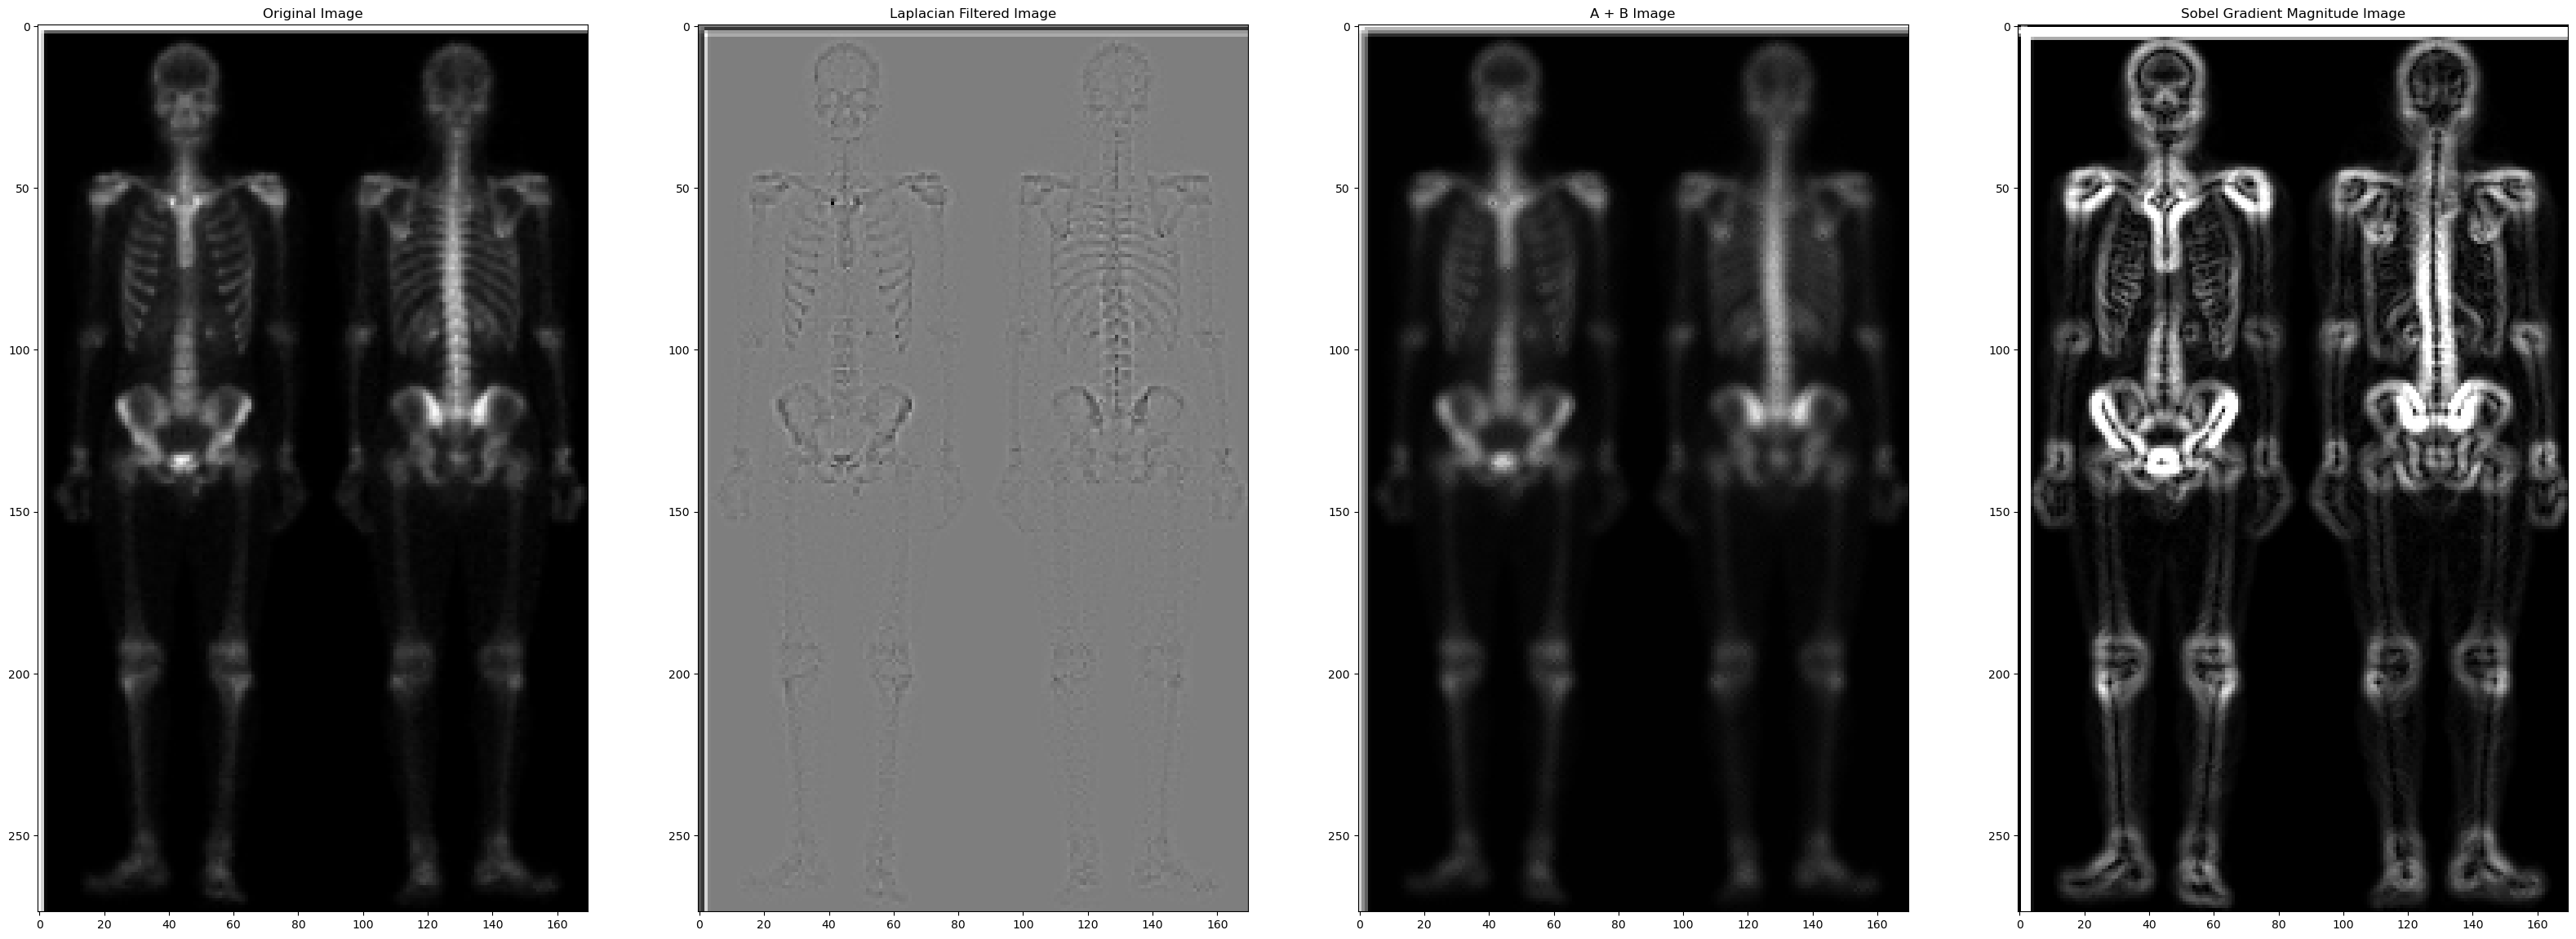

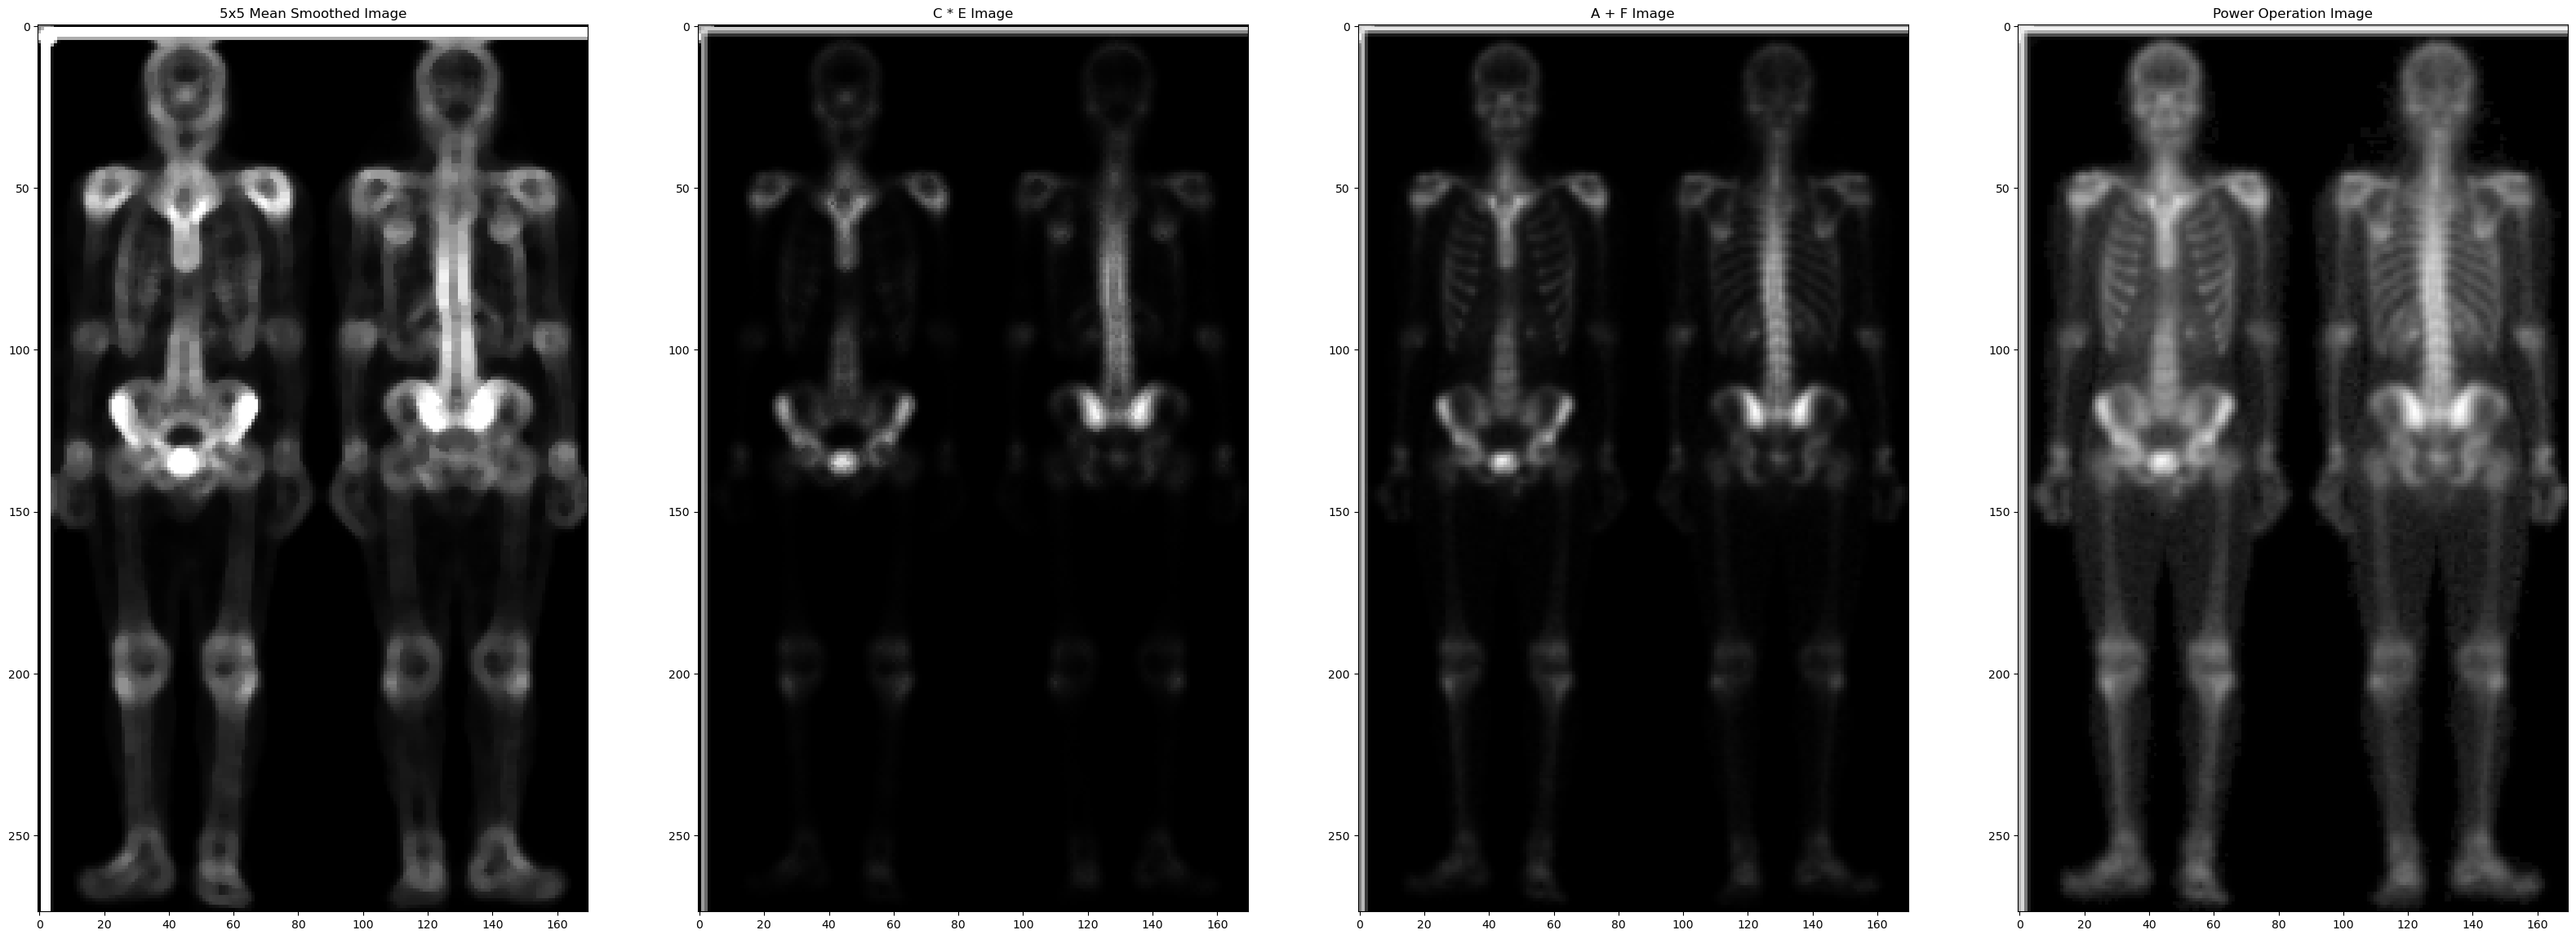